# Guided Project: Investigating Fandango Movie Ratings

We're going to investigate the ratings made by Fandango because there was discrepancy between the number of stars displayed to users and the actual rating.

Fandango replied that the biased was caused by a bug and would fix the bug. Our purpose for this project is to **analyze** and **determine** if there are any change in the rating system after the Hickey's analysis.

The data of Hickey analysis is on [Github](https://github.com/fivethirtyeight/data/tree/master/fandango). We're going to use the Dataquest's team data on [Github](https://github.com/mircealex/Movie_ratings_2016_17).

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# Loading csv files to pandas
fandango_score = pd.read_csv('fandango_score_comparison.csv')
dq_movie_ratings = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
# Isolating the columns of Fandango's ratings and other dataset
fandango_ratings = fandango_score[['FILM', 'Fandango_Stars'
                                  ,'Fandango_Ratingvalue'
                                  ,'Fandango_votes', 'Fandango_Difference']]
other_dataset = dq_movie_ratings[['movie', 'year', 'fandango']]

Define the population of interest for our goal. The goal is to determine whether there has been any change in Fandango's rating after Kickey's analysis

In [4]:
fandango_ratings.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
fandango_ratings.tail()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
141,Mr. Holmes (2015),4.0,4.0,1348,0.0
142,'71 (2015),3.5,3.5,192,0.0
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0
145,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,0.0


In [6]:
other_dataset.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [7]:
other_dataset.tail()

,movie,year,fandango
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5
213,Zootopia,2016,4.5


In [8]:
fandango_ratings.loc[fandango_ratings['FILM'].str.lower()
                     .str.contains(r"men")]

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
117,Testament of Youth (2015),4.0,3.9,127,0.1
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1


It seems the movies or films on both dataset are unique to each other.

With the new goal, we now have two populations that we want to describe and compare with each other
- All Fandango's ratings for popular movies released in 2015
- All Fandango's ratings for popular movies released in 2016

The term "popular" is vauge and we need to define it with precision. We'll consider popular if the fan ratins has 30 or more

The other dataset doesn't provide information about the number of fan ratings

In [9]:
# Check the unique values of year column in other_dataset
other_dataset['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [10]:
# Isolating the years of our focus to 2015-2016 only
# We only need 2016 bec there is no 2015
focus_year_other = other_dataset[other_dataset['year'] == 2016]

In [11]:
# Create a new year column for fandango ratings
fandango_ratings['year'] = fandango_ratings['FILM'].str.extract(r"([1-2][0-9]{3})")
# Check unique value of year in the fandango ratings
fandango_ratings['year'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



2015    129
2014     17
Name: year, dtype: int64

In [12]:
focus_year_fandango = fandango_ratings[fandango_ratings['year'] == '2015']

In [13]:
# Check sample for fandango_ratings
focus_year_fandango.sample(10, random_state=0)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
48,Fantastic Four (2015),3.0,2.7,6288,0.3,2015
31,When Marnie Was There (2015),4.5,4.1,46,0.4,2015
123,Magic Mike XXL (2015),4.5,4.4,9363,0.1,2015
59,Mortdecai (2015),3.5,3.2,1196,0.3,2015
9,Love & Mercy (2015),4.5,4.0,864,0.5,2015
138,Spare Parts (2015),4.5,4.5,450,0.0,2015
52,The Age of Adaline (2015),4.5,4.2,3325,0.3,2015
120,The Wolfpack (2015),3.5,3.4,66,0.1,2015
85,Little Boy (2015),4.5,4.3,811,0.2,2015
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5,2015


In [14]:
# check the fan ratings of fandango
sum(focus_year_fandango['Fandango_votes'] < 30)

0

There are none movies with less than 30 fan ratings on Fandango

In [15]:
focus_year_other.sample(10, random_state=0)

,movie,year,fandango
121,Nerve,2016,4.0
83,Jane Got a Gun,2016,3.5
179,The Great Wall,2016,4.0
108,Mechanic: Resurrection,2016,4.0
136,Resident Evil: The Final Chapter,2016,4.0
80,Inferno,2016,3.5
22,Ben-Hur,2016,4.0
137,Ride Along 2,2016,4.0
160,The Angry Birds Movie,2016,4.0
8,Allied,2016,4.0


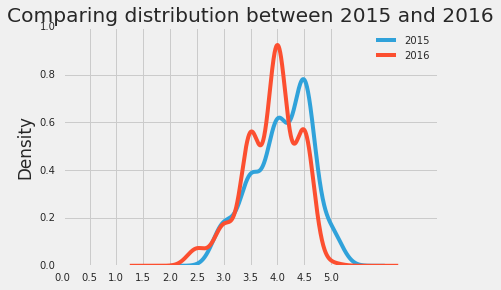

In [16]:
# Generate two kernel density plots
plt.style.use('fivethirtyeight')
focus_year_fandango['Fandango_Stars'].plot.kde(label='2015', legend=True)
focus_year_other['fandango'].plot.kde(label='2016', legend=True)
plt.title('Comparing distribution between 2015 and 2016')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

Analyze and answer the ff questions
- What is the shape of each distribution?
- How do their shapes compare?
- If their shapes are similar, is there anything that clearly differentiates them?
- Can we see any evidence on the graph that suggests that there is indeed a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016?
- Provided there's a difference, can we tell anything about the direction of the difference? In other owrds, were movies in 2016 rated lower or higher compared to 2015?

Both are left skewed. The 2016 shows slightly shift to the left which could fix the ratings bug.

Check the frequency distribution tables of the two dataset

In [17]:
focus_year_fandango['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [18]:
focus_year_other['fandango'].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

The 2015 distribution(fandango) shows the ratings towards to highest. While 2016 distribution shows the 5.0 rating is even less than one percent, most of the ratings are in the median and the lowest rating appears as 2.5 with three percent.

In [19]:
mean_2015 = focus_year_fandango['Fandango_Stars'].mean()
median_2015 = focus_year_fandango['Fandango_Stars'].median()
mode_2015 = focus_year_fandango['Fandango_Stars'].mode()[0]
mean_2016 = focus_year_other['fandango'].mean()
median_2016 = focus_year_other['fandango'].median()
mode_2016 = focus_year_other['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


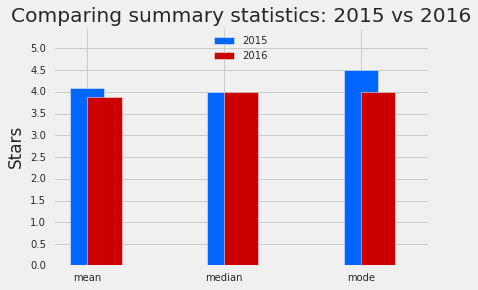

In [20]:
summary['2015'].plot.bar(label='2015', align='center', color = '#0066FF', width = .25)
summary['2016'].plot.bar(label='2016', align='edge', color = '#CC0000', rot=0, width = .25)
plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The mean is lower in 2016 while the mode of 2015 is higher. It's clear that Fandango might given the real ratings after the  bug or biased.